#  Machine learning project notebook

### Student: G00219132 Susan Hudson - Module: Machine Learning & Statistics, GMIT

In [1]:
import datetime
print('\n'*2)
print ('**************************************************')
print ("Run date and time: " ,datetime.datetime.now().strftime("Date: %d-%m-%y    Time: %H-%M"))
print ('**************************************************')
print()
print()





**************************************************
Run date and time:  Date: 04-12-19    Time: 18-48
**************************************************




In [2]:
#command below ensures plots display correctly in the notebook

#below imports all necessary python packages for this notebook
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [10, 6]
%matplotlib inline
import seaborn as sns
import pandas as pd
import scipy.stats as ss
import numpy as np
import sklearn.datasets
import seaborn as sns
import keras as kr

Using TensorFlow backend.


## Import dataset and Descriptive Statistics

In [3]:
# dataset is imported and converted to a pandas dataframe
sklearn.datasets.load_boston
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

In [4]:
# check data set shape and print first five rows
print(boston.data.shape)
df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

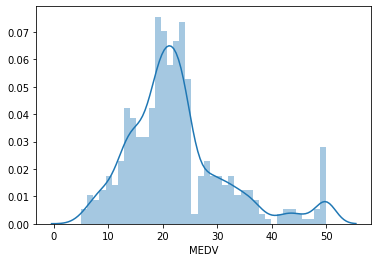

In [7]:
sns.distplot(df["MEDV"], bins=40)
plt.show()


Plot of Median Value shows a mainly mormal distribution.

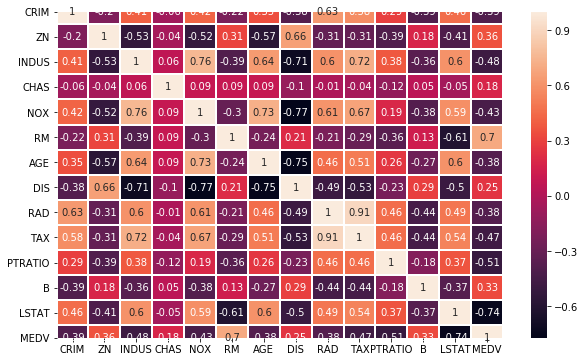

In [8]:
# correlation heatmap
correlation_heatmap = df.corr().round(2)

#ax.set_ylim(len(df)-.5 ,-.5)
fig, ax = plt.subplots(figsize=(10,6))   
#ax.set_ylim(len(df)-.5 ,-.5)
sns.heatmap(correlation_heatmap, annot=True,linewidths= 1, ax=ax)

plt.show()

In [9]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


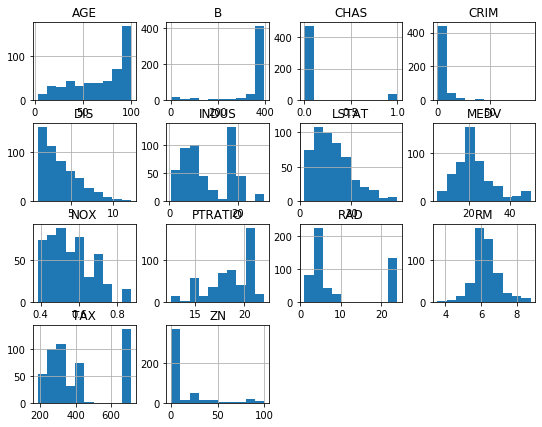

In [10]:
df.hist(bins=10, figsize=(9,7), grid=True)
plt.show()

//sns.set(style="ticks", color_codes=True)
//sns.pairplot(df)

In [11]:
# create two subsets to do a t test to see whether the mean of median values is the same for houses bordering the river 
# and houses not near the river. the hypothesis I am testing being that there is no difference in the average median value
# of properties based on riverside location.
# note: not really sure this is of any value as within each subset will be other variables that have a greater impact on price
# for example - number of rooms may be influencing price

dfnear =  df[(df['CHAS'] == 1.0)]
dfnear.reset_index(inplace= True)
#print(dfnear)


dffar =  df[(df['CHAS'] == 0.0)]
dffar.reset_index(inplace= True)
#print(dffar)

from scipy.stats import ttest_ind
n =dfnear['MEDV']
f =dffar['MEDV']
ss.ttest_ind(n,f)

# result obtained causes me to reject the hypothesis

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

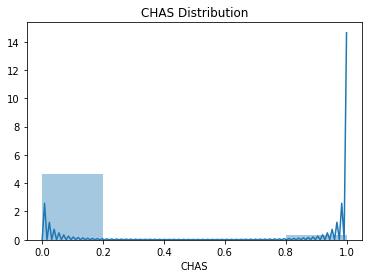

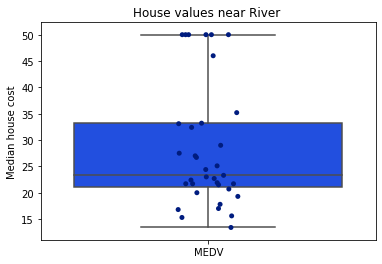

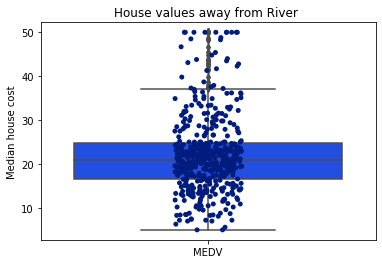

In [12]:
sns.distplot(df["CHAS"], bins=5).set_title ("CHAS Distribution")
plt.show()


df4 = pd.DataFrame(data = dfnear, columns = [ 'MEDV'] )
sns.boxplot(x="variable", y="value", data= pd.melt(df4), palette="bright").set_title("House values near River ")
sns.stripplot(x="variable", y="value", data= pd.melt(df4), palette="dark").set_title("House values near River ")
plt.ylabel('Median house cost')
plt.xlabel('')
plt.show()


df5 = pd.DataFrame(data = dffar, columns = [ 'MEDV'] )
sns.stripplot (x="variable", y="value", data= pd.melt(df5), palette="dark").set_title("House values away from River ")

sns.boxplot(x="variable", y="value", data= pd.melt(df5), palette="bright").set_title("House values away from River ")
plt.ylabel('Median house cost')
plt.xlabel('')
plt.show()

## predictive

Build a neural network using keras and splitting the data into train (80%) and test (20%)


In [13]:
# check data types
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [14]:
from sklearn.model_selection import train_test_split 
#dataset = df.values
#dataset =   df[(df['RM', 'ZN', 'PTRATIO', 'LSTAT','MEDV'])]
#print(dataset)
Y=df['MEDV']
print(Y)
X =df[['ZN','RM', 'LSTAT','PTRATIO' ]]

print(X)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64
       ZN     RM  LSTAT  PTRATIO
0    18.0  6.575   4.98     15.3
1     0.0  6.421   9.14     17.8
2     0.0  7.185   4.03     17.8
3     0.0  6.998   2.94     18.7
4     0.0  7.147   5.33     18.7
..    ...    ...    ...      ...
501   0.0  6.593   9.67     21.0
502   0.0  6.120   9.08     21.0
503   0.0  6.976   5.64     21.0
504   0.0  6.794   6.48     21.0
505   0.0  6.030   7.88     21.0

[506 rows x 4 columns]


In [15]:
X = df.iloc[:,0:13]
Y = df.iloc[:,13]
#Y
#Y=df['MEDV']
print(Y)
#X =df[['ZN','RM', 'LSTAT','PTRATIO' ]]
X 

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


   ## Pre Processing of Data for Keras

### scaling

In [16]:
from sklearn.model_selection import train_test_split 

In [17]:
#preprocessing of all dataset[]
# scaling 
import sklearn.preprocessing as pre
xscale = pd.DataFrame(pre.scale(X), columns = X.columns)
xscale
yscale = pd.DataFrame(pre.scale(Y))
xscale, yscale

(         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
 0   -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
 1   -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
 2   -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
 3   -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
 4   -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
 ..        ...       ...       ...       ...       ...       ...       ...   
 501 -0.413229 -0.487722  0.115738 -0.272599  0.158124  0.439316  0.018673   
 502 -0.415249 -0.487722  0.115738 -0.272599  0.158124 -0.234548  0.288933   
 503 -0.413447 -0.487722  0.115738 -0.272599  0.158124  0.984960  0.797449   
 504 -0.407764 -0.487722  0.115738 -0.272599  0.158124  0.725672  0.736996   
 505 -0.415000 -0.487722  0.115738 -0.272599  0.158124 -0.362767  0.434732   
 
           DIS       RAD       TAX   PTRATIO         B     LST

### fitting and transforming

In [18]:
scaler=pre.StandardScaler()
scaler.fit(X)
X
scaler.mean_ , X.std()

(array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
        5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
        9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
        1.26530632e+01]), CRIM         8.601545
 ZN          23.322453
 INDUS        6.860353
 CHAS         0.253994
 NOX          0.115878
 RM           0.702617
 AGE         28.148861
 DIS          2.105710
 RAD          8.707259
 TAX        168.537116
 PTRATIO      2.164946
 B           91.294864
 LSTAT        7.141062
 dtype: float64)

In [19]:
xscale = pd.DataFrame(scaler.transform(X), columns = X.columns)
xscale

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [20]:
##X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
X_train, X_test, Y_train, Y_test = train_test_split(xscale, yscale, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_test)
print(X_test)

(404, 13)
(102, 13)
(404, 1)
(102, 1)
            0
242 -0.036222
323 -0.438920
178  0.801827
288 -0.025338
420 -0.634828
..        ...
274  1.073920
346 -0.580409
496 -0.308315
74   0.170569
341  1.106572

[102 rows x 1 columns]
         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
242 -0.408543  0.799865 -0.905627 -0.272599 -1.094434  0.104521 -0.557408   
323 -0.387477 -0.487722 -0.548149 -0.272599 -0.532942 -0.821507  0.203588   
178 -0.412788 -0.487722 -1.034027 -0.272599 -0.386091  0.819700  0.207144   
288 -0.415176  1.765555 -0.848722 -0.272599 -1.293115  0.043261 -0.817001   
420  0.869759 -0.487722  1.015999 -0.272599  1.410682  0.180028  1.117494   
..        ...       ...       ...       ...       ...       ...       ...   
274 -0.413949  1.229060 -0.689681  3.668398 -0.930305  0.674384 -1.268620   
346 -0.413346 -0.487722 -0.984418 -0.272599 -0.973497 -0.550822 -0.578745   
496 -0.386816 -0.487722 -0.211099 -0.272599  0.261784 -1.274549  0.153803   


### whitening data

In [21]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [22]:
import sklearn.decomposition as dec
pca = dec.PCA(n_components = 13, whiten = True)
pca.fit(X_train)
x_train_white = pd.DataFrame(pca.transform(X_train), columns=X.columns)
x_train_white

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.902893,-1.238647,0.541809,0.831515,1.888110,-1.558809,0.224627,-0.920878,-0.654974,-1.691481,1.560682,0.963425,0.163273
1,-1.076349,-0.249311,-0.195466,-0.576574,-0.290463,-0.857198,0.389394,2.322250,0.440492,-1.610052,0.625662,1.109779,-0.388673
2,-0.278645,1.942808,0.528350,2.629880,-1.230569,-1.549494,0.654434,0.384354,0.161324,-0.771447,0.149322,-0.303431,0.085439
3,-0.756927,-0.004156,-0.502809,0.138565,0.407357,0.068133,-0.257596,2.646336,0.601710,-2.120929,-0.826049,-0.600897,-0.729701
4,-0.105634,-0.347323,-1.786212,1.559576,0.913468,-0.716001,0.383521,1.104617,-0.052880,-3.799933,3.592454,0.038394,0.048519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.631338,0.668083,-1.228928,-0.375866,-0.338230,-0.134015,-0.934206,-0.728651,2.184852,0.247585,-0.692255,0.196456,0.867792
400,1.244898,-0.220846,0.131413,-0.464648,-0.980895,1.040222,-0.778350,-0.391465,-0.781720,-0.147835,-0.159798,0.760940,-0.464227
401,1.407817,-0.503669,-0.427229,0.412279,-0.143074,0.142767,-0.507004,-0.729485,-1.147985,-0.991828,0.632905,-2.031765,-0.244654
402,-0.275943,0.017660,-1.217099,-0.214945,-0.781661,-0.837459,0.158810,0.501023,0.480733,1.245286,0.241996,1.184873,0.141460


In [23]:
x_train_white.corr().round(),x_train_white.mean().round(),x_train_white.std().round()

(         CRIM   ZN  INDUS  CHAS  NOX   RM  AGE  DIS  RAD  TAX  PTRATIO    B  \
 CRIM      1.0  0.0   -0.0   0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0      0.0  0.0   
 ZN        0.0  1.0   -0.0  -0.0  0.0 -0.0  0.0  0.0 -0.0 -0.0     -0.0 -0.0   
 INDUS    -0.0 -0.0    1.0   0.0 -0.0  0.0 -0.0  0.0 -0.0 -0.0     -0.0  0.0   
 CHAS      0.0 -0.0    0.0   1.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0     -0.0 -0.0   
 NOX       0.0  0.0   -0.0  -0.0  1.0  0.0  0.0 -0.0  0.0  0.0      0.0  0.0   
 RM       -0.0 -0.0    0.0   0.0  0.0  1.0  0.0 -0.0 -0.0  0.0     -0.0  0.0   
 AGE       0.0  0.0   -0.0  -0.0  0.0  0.0  1.0  0.0  0.0 -0.0      0.0  0.0   
 DIS      -0.0  0.0    0.0  -0.0 -0.0 -0.0  0.0  1.0 -0.0  0.0      0.0 -0.0   
 RAD      -0.0 -0.0   -0.0  -0.0  0.0 -0.0  0.0 -0.0  1.0  0.0      0.0 -0.0   
 TAX      -0.0 -0.0   -0.0   0.0  0.0  0.0 -0.0  0.0  0.0  1.0     -0.0  0.0   
 PTRATIO   0.0 -0.0   -0.0  -0.0  0.0 -0.0  0.0  0.0  0.0 -0.0      1.0  0.0   
 B         0.0 -0.0    0.0  -0.0  0.0  0

### build neural network model

In [24]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation

m = models.Sequential()
#m.add(layers.Dense(52, activation='relu', input_dim =13))
#m.add(Dense(40,input_dim=13,kernel_initializer='normal',activation='relu',use_bias=False))
m.add(layers.Dense(64, activation='relu', input_dim =13))
#m.add(layers.Dense(52, activation='relu'))
#m.add(layers.Dense(1,))
#m.add(Dense(40,kernel_initializer='random_uniform',activation='relu',use_bias=False))
m.add(Dense(1,kernel_initializer='normal',activation='linear',use_bias=False))


m.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
    


In [25]:
#_train, X_test, Y_train, Y_test = train_test_split(xscale, yscale, test_size = 0.2)
#X_train, X_test, Y_train, Y_test = train_test_split(xwhite,scale, test_size = 0.2)

#print(X_train.shape)
#print(X_test.shape)
#print(Y_train.shape)
#print(Y_test.shape)
#print(Y_test)
#print(X_test)

In [26]:
#x = X_train
#y = m.predict()

#history = m.fit(X_train,Y_train, validation_split = 0.20,epochs =150, batch_size =25)
#history = m.fit(x_train_white,Y_train, validation_split = 0.20,epochs =150, batch_size =25)
history = m.fit(x_train_white,Y_train, epochs =75, batch_size =25)

#history = m.fit(X_train,Y_train,epochs =150, batch_size =25)
print(history.history.keys())



Epoch 1/75
404/404 [==============================] - 0s 454us/step - loss: 1.0201 - accuracy: 0.0000e+00
Epoch 2/75
404/404 [==============================] - 0s 69us/step - loss: 0.8462 - accuracy: 0.0000e+00
Epoch 3/75
404/404 [==============================] - 0s 54us/step - loss: 0.7063 - accuracy: 0.0000e+00
Epoch 4/75
404/404 [==============================] - 0s 77us/step - loss: 0.5726 - accuracy: 0.0000e+00
Epoch 5/75
404/404 [==============================] - 0s 81us/step - loss: 0.4631 - accuracy: 0.0000e+00
Epoch 6/75
404/404 [==============================] - 0s 64us/step - loss: 0.3715 - accuracy: 0.0000e+00
Epoch 7/75
404/404 [==============================] - 0s 54us/step - loss: 0.3049 - accuracy: 0.0000e+00
Epoch 8/75
404/404 [==============================] - 0s 69us/step - loss: 0.2617 - accuracy: 0.0000e+00
Epoch 9/75
404/404 [==============================] - 0s 52us/step - loss: 0.2347 - accuracy: 0.0000e+00
Epoch 10/75
404/404 [==============================] -

In [27]:
x_test_white = scaler.transform(X_test)
m.predict(x_test_white).round().T
Y_test.as_matrix().astype(np.float32)
m.evaluate(x_test_white, Y_test)

102/102 [==============================] - 0s 557us/step


C:\Users\shudson\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


[4.017499876957314, 0.0]

KeyError: 'val_loss'

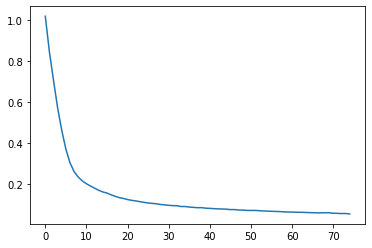

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
m.predict(X_test).T
m.summary()
print (m.predict(X_test).T)


In [ ]:
#output = (Y_test)
#print(output)
#np.sqrt(np.sum((m.predict(X_test).T -output)**2))

## references

In [ ]:
https://keras.io/models/about-keras-models/
Python Data Analysis - Fandango, Armando

Pre Processing Data
https://scikit-learn.org/stable/modules/preprocessing.html
    

test git desktop
    